In [4]:
from models import *
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets import *
from constants import *
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from segmentation_inference import *

device = "cpu"
from custom_transformations import *



In [3]:
"""transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = JSRTDataset(image_folder="data/JSRT/png_images",
                      mask_folder="data/JSRT/masks/both_lungs",
                      image_transform=image_transformation, mask_transform=mask_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)
input_data, gt = (next(iter(dataloader)))
input_data.to(device)
gt.to(device)

with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.round(output)
    gt = gt.squeeze()
    gtbool = gt > 0.5
    outputbool = output > 0.5
    intersection = torch.logical_and(gtbool, outputbool)
    union = torch.logical_or(gtbool, outputbool)
    print(torch.sum(intersection) / torch.sum(union))
    input_img = transforms.ToPILImage()(gt)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gt)
    ax2.imshow(output_img)"""

Start loading dataset


NameError: name 'device' is not defined

In [7]:
"""transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]
image_transformation_list = [
    transforms.Resize((256, 256)),
    HistogramEqualization()
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(transformation_list)
mask_transformation = transforms.Compose(
    transformation_list)

print("Start loading dataset")

dataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",
                          uncertainty_policy="zeros", transform=image_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

input_data, _ = (next(iter(dataloader)))

with torch.no_grad():
    output = model(input_data)["out"]
    output = output.squeeze()
    output = torch.sigmoid(output)
    print(output.max())
    output = torch.round(output)
    print(output)
    input_data = input_data.squeeze()
    input_img = transforms.ToPILImage()(input_data)
    output_img = transforms.ToPILImage()(output)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(input_img)
    ax2.imshow(output_img)"""

SyntaxError: invalid syntax. Perhaps you forgot a comma? (478612583.py, line 7)

Start loading dataset
Label: 0.0
CTR: 0.42857142857142855


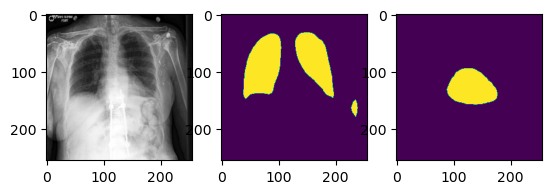

In [20]:
image_transformation_list = [
    transforms.Resize((256, 256)),
    HistogramEqualization(),
    transforms.ToTensor(),
]

mask_transformation_list = [
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
]

image_transformation = transforms.Compose(image_transformation_list)
mask_transformation = transforms.Compose(
    mask_transformation_list)

print("Start loading dataset")

dataset = CheXpertDataset(data_path="./data/CheXpert-v1.0-small/valid.csv",
                          uncertainty_policy="zeros", transform=image_transformation)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

heart_model = load_model("models/heart_segmentation/hist_eq_lr=0.0001_batch=3_21.3_20:22.pth")
lung_model = load_model("models/lung_segmentation/hist_eq_lr=0.0001_batch=3_21.3_18:46.pth")

input_data, label = (next(iter(dataloader)))

heart_mask = infer_from_tensor(input_data, heart_model)
lung_mask = infer_from_tensor(input_data, lung_model)

ctr = ctr_from_tensor(input_data, heart_segmentation_model=heart_model, lung_segmentation_model=lung_model)
input_data = input_data.squeeze()
input_img = transforms.ToPILImage()(input_data)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(input_img)
ax2.imshow(transforms.ToPILImage()(lung_mask))
ax3.imshow(transforms.ToPILImage()(heart_mask))

print(f"Label: {label.item()}")
print(f"CTR: {ctr}")
